## WEEK 8 WEEKDAY WORK
 
1. List the output of your Neural Network analysis and describe the results in no less than 5 sentences. (2 points)
2. Tune your Neural Network such that your prediction results approach the quality of your Random Forest run. Include your code and explain in no less than 5 sentences how you adjusted the hidden layers, and what your adjustments have changed about how the algorithm works. (2 points)
3. Then look at your runs with Multiple and Logistic Regression. Write a Gradient Descent routine to see if you can improve on the quality of one of them. Include your code and your visualization(s) and explain in no less than 5 sentences how using Gradient Descent has improved your regression formula. If it hasn’t, explain why not. (2 points

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading the train HR Analytics: Job Change of Data Scientists dataframe
job = pd.read_csv('https://raw.githubusercontent.com/faheemkhan2021/khan__IT533/master/Job%20Change/aug_train.csv')


#Verifying that we can see the data
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [2]:
#  the numeric features into a dataframe and use them to predict the enrollee using target where 0 is Not looking for job change, and  1 Looking for a job change



job1 = pd.DataFrame(job, columns = ['enrollee_id', 'city_development_index', 'training_hours', 'target'])
job1.head()

,enrollee_id,city_development_index,training_hours,target
0,8949,0.920,36,1.0
1,29725,0.776,47,0.0
2,11561,0.624,83,0.0
3,33241,0.789,52,1.0
4,666,0.767,8,0.0


In [3]:
from sklearn.model_selection import train_test_split
x=job1.iloc[:,:3]
y=job1['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (15326, 3)
X_test shape: (3832, 3)


In [4]:
# the model with 100 trees
# Configuring the classifier and Training the Classifier
# default number of trees is 100
jb = RandomForestClassifier()
jb.fit(X_train, y_train)
y_pred = jb.predict(X_test)

In [5]:
# Accuracy score

print("Test set score: {:.2f}".format(jb.score(X_test, y_test)))

Test set score: 0.74


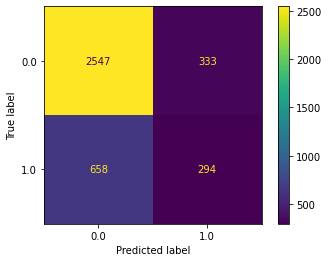

In [6]:
# Plot Confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(jb, X_test, y_test)

In [7]:
# Running the Classification report

import sklearn.metrics as metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1., 0.]))

              precision    recall  f1-score   support

         1.0       0.47      0.31      0.37       952
         0.0       0.79      0.88      0.84      2880

    accuracy                           0.74      3832
   macro avg       0.63      0.60      0.60      3832
weighted avg       0.71      0.74      0.72      3832



In [8]:
# the model with 1000 trees
n_estimators = 1000 # This is the number of different trees to build; default was 100; we are increasing this number tenfold.
min_samples_split = 5 # Previously, we ran this with the default split of 2
criterion='entropy' # This is for Information Gain; previously, we ran this with the Gini Index

# Configuring the classifier and Training the Classifier

jb2 = RandomForestClassifier(verbose=1, n_estimators=n_estimators, min_samples_split=min_samples_split, criterion=criterion)
jb2.fit(X_train, y_train)
y_pred1 = jb2.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   44.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished


In [9]:
# Accuracy score

print("Test set score: {:.2f}".format(jb2.score(X_test, y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set score: 0.76


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished


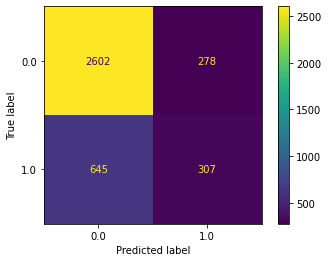

In [10]:
# Plot Confusion matrix


plot_confusion_matrix(jb2, X_test, y_test)

In [13]:
# Running the Classification report


print(classification_report(y_test, y_pred1, labels=[1., 0.]))

              precision    recall  f1-score   support

         1.0       0.52      0.32      0.40       952
         0.0       0.80      0.90      0.85      2880

    accuracy                           0.76      3832
   macro avg       0.66      0.61      0.62      3832
weighted avg       0.73      0.76      0.74      3832



16144    0.0
13661    0.0
344      0.0
1034     0.0
8109     0.0
        ... 
13955    0.0
13463    0.0
18772    0.0
12809    0.0
1593     0.0
Name: target, Length: 3832, dtype: float64

3. Explain which model is better and why (2 points).

 The model with 1,000 trees is better than the model with 100 trees. This is because the accuracy score improved from 74 % to 76 %, the classification matrix for the model with 100 trees correctly predicted 2547 values for enrollees not looking for a job change on 0.0 while the 1000 trees correctly predicted 2602 values and  the classification report also shows an improvement in the percentage of correctly predicted values for example in 0.0 for enrollees not looking for a job change improved from 79% to 80 %.